<a href="https://colab.research.google.com/github/Naveenchode/Covid19/blob/main/CNN_600.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset : http://cb.lk/covid_19
 
#!wget http://cb.lk/covid_19

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
#(covid + normal)
!unzip /content/gdrive/MyDrive/CovidDataset.zip

Archive:  /content/gdrive/MyDrive/CovidDataset.zip
   creating: cov/Train/
   creating: cov/Train/covid/
  inflating: cov/Train/covid/001.jpeg  
  inflating: cov/Train/covid/002.jpeg  
  inflating: cov/Train/covid/003.jpeg  
  inflating: cov/Train/covid/004.jpeg  
  inflating: cov/Train/covid/005.jpeg  
  inflating: cov/Train/covid/006.jpeg  
  inflating: cov/Train/covid/007.jpg  
  inflating: cov/Train/covid/008.jpg  
  inflating: cov/Train/covid/009.jpg  
  inflating: cov/Train/covid/010.jpeg  
  inflating: cov/Train/covid/011.jpeg  
  inflating: cov/Train/covid/012.jpeg  
  inflating: cov/Train/covid/013.jpeg  
  inflating: cov/Train/covid/014.jpeg  
  inflating: cov/Train/covid/015.jpeg  
  inflating: cov/Train/covid/016.jpeg  
  inflating: cov/Train/covid/017.jpeg  
  inflating: cov/Train/covid/018.jpeg  
  inflating: cov/Train/covid/019.jpeg  
  inflating: cov/Train/covid/01E392EE-69F9-4E33-BFCE-E5C968654078-768x572.jpeg  
  inflating: cov/Train/covid/020.jpg  
  inflating: cov/T

In [3]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [5]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = "relu", input_shape = (224,224,3), padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(100, activation = 'relu'))

model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 128)       0

In [8]:
!pip install visualkeras

     |████████████████████████████████| 798kB 10.1MB/s 


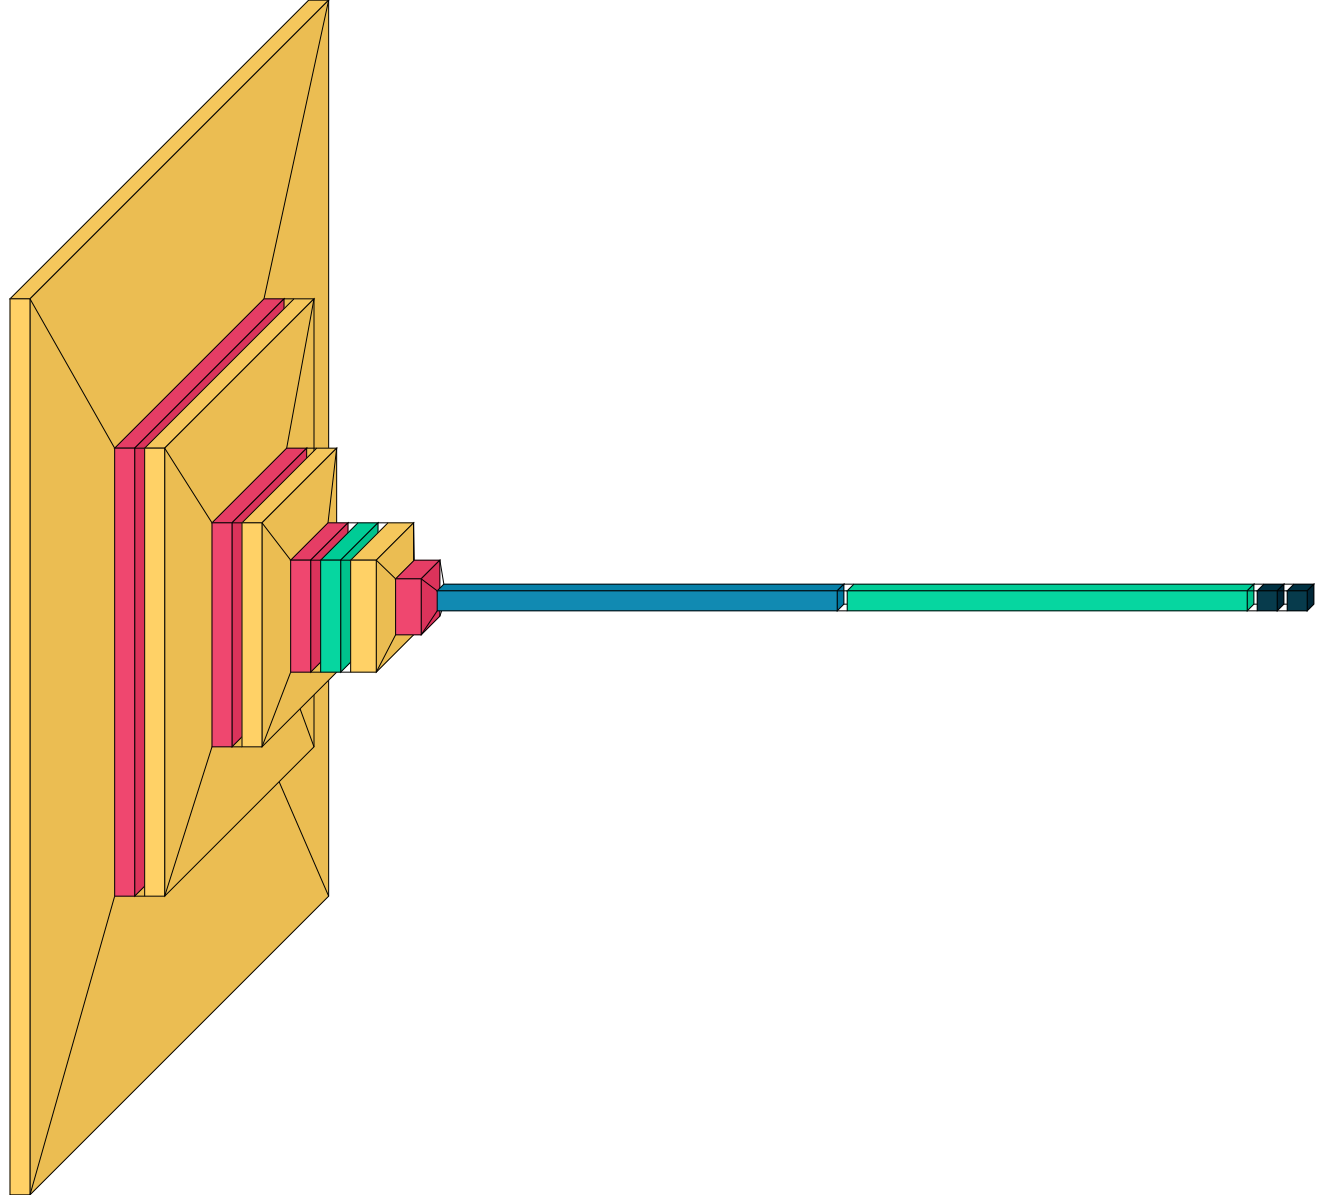

In [9]:
import visualkeras
visualkeras.layered_view(model)

In [10]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    '/content/cov/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 3963 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [14]:
validation_generator = test_dataset.flow_from_directory(
    '/content/cov/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 600 images belonging to 2 classes.


In [41]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.model', monitor = 'val_loss', verbose = 0, save_best_only = True, mode = 'auto')

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 11s 1s/step - loss: 0.3885 - accuracy: 0.8250 - val_loss: 0.7710 - val_accuracy: 0.5938
Epoch 2/10
10/10 [==============================] - 10s 1s/step - loss: 0.4009 - accuracy: 0.8156 - val_loss: 0.6954 - val_accuracy: 0.6406
Epoch 3/10
10/10 [==============================] - 9s 921ms/step - loss: 0.3893 - accuracy: 0.8190 - val_loss: 0.5699 - val_accuracy: 0.7500
Epoch 4/10
10/10 [==============================] - 10s 980ms/step - loss: 0.3516 - accuracy: 0.8500 - val_loss: 0.8560 - val_accuracy: 0.6406
Epoch 5/10
10/10 [==============================] - 9s 937ms/step - loss: 0.3688 - accuracy: 0.8286 - val_loss: 1.0494 - val_accuracy: 0.6562
Epoch 6/10
10/10 [==============================] - 10s 1s/step - loss: 0.3567 - accuracy: 0.8469 - val_loss: 0.9440 - val_accuracy: 0.7344
Epoch 7/10
10/10 [==============================] - 10s 988ms/step - loss: 0.3530 - accuracy: 0.8469 - val_loss: 0.8402 - val_accuracy: 0.6719
Epoch 8/10

In [42]:
model.save("modeln.h5")

In [43]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.3211916387081146, 0.8730759620666504]

In [44]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.8493126034736633, 0.653333306312561]

In [ ]:
model=load_model("modeln.h5")

In [45]:
import os


In [46]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [47]:
y_actual=[]
y_test=[]

In [48]:
for i in os.listdir("./cov/Val/normal/"):
  img=image.load_img("./cov/Val/normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [49]:
for i in os.listdir("./cov/Val/covid/"):
  img=image.load_img("./cov/Val/covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [50]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
cm=confusion_matrix(y_actual,y_test)

In [53]:
!pip install seaborn

In [54]:
import seaborn as sns

[[204  96]
 [160 140]]


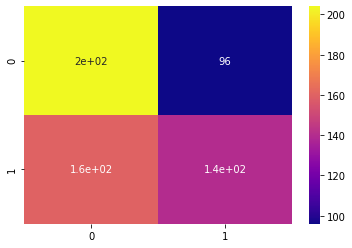

In [55]:
print(cm)
sns.heatmap(cm,cmap="plasma",annot=True)

In [56]:
  from sklearn.metrics import classification_report, confusion_matrix

In [57]:
 print(classification_report(y_actual,y_test, target_names=['covid','normal']))

              precision    recall  f1-score   support

       covid       0.56      0.68      0.61       300
      normal       0.59      0.47      0.52       300

    accuracy                           0.57       600
   macro avg       0.58      0.57      0.57       600
weighted avg       0.58      0.57      0.57       600

